In [ ]:
# pipenv install scikit-learn scipy pandas matplotlib seaborn ipykernel pingouin fastapi pydantic streamlit uvicorn requests

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar dataset
df_salario = pd.read_csv('.\datasets\salario.csv')

In [3]:
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [ ]:
df_salario_eda = df_salario.copy()
df_salario_bucketing = df_salario.copy()

## EDA

In [6]:
df_salario_eda.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35
7,85,2,6424.92
8,66,5,3916.18
9,73,5,4751.79


In [7]:
# Valores ausentes
df_salario_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [8]:
# Medidas estatisticas
df_salario_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


<Axes: xlabel='tempo_na_empresa'>

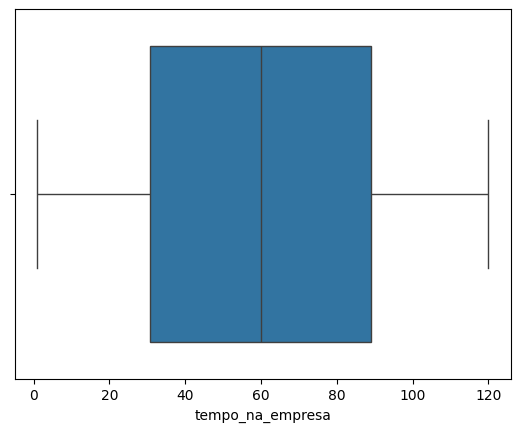

In [9]:
# Verificar outliers
sns.boxplot(data=df_salario_eda, x='tempo_na_empresa')

<Axes: xlabel='nivel_na_empresa'>

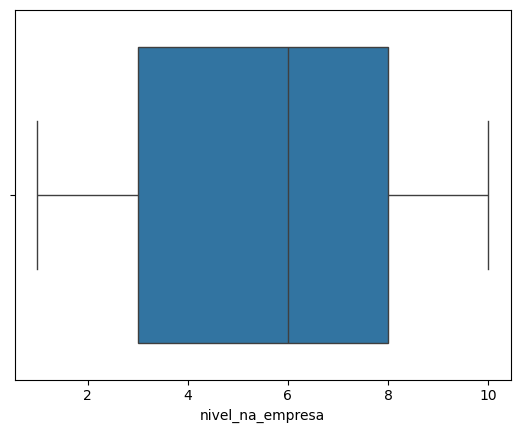

In [10]:
sns.boxplot(data=df_salario_eda, x='nivel_na_empresa')

<Axes: xlabel='salario_em_reais'>

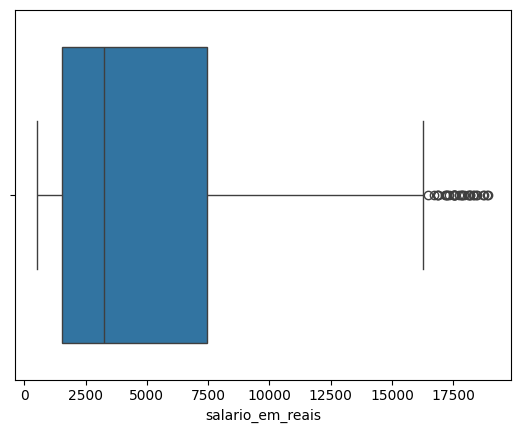

In [11]:
sns.boxplot(data=df_salario_eda, x='salario_em_reais')

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

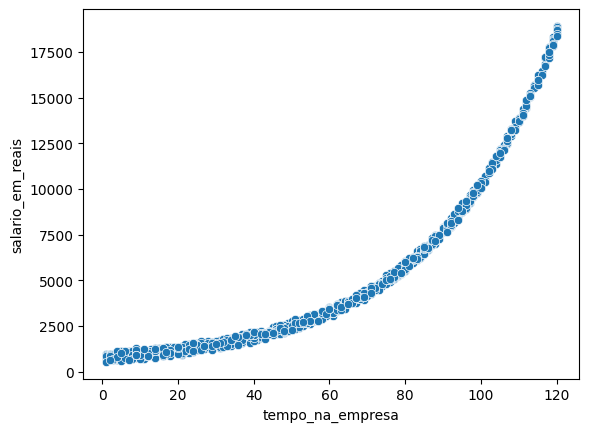

In [12]:
# Cruzamento das variaveis numericas com salario em reais
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

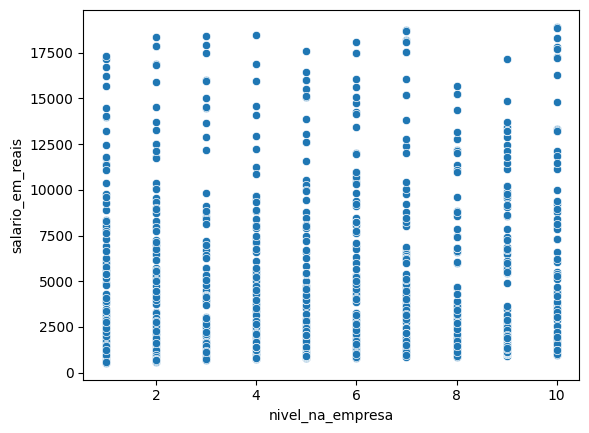

In [13]:
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='tempo_na_empresa'>

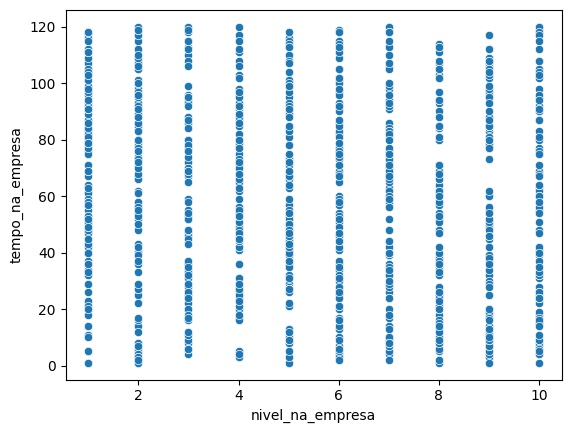

In [14]:
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='tempo_na_empresa')

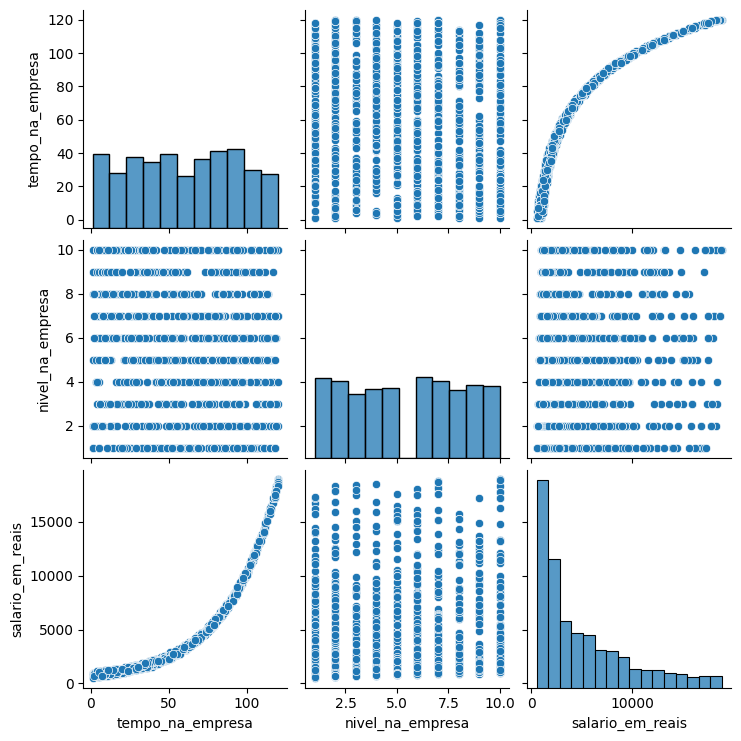

In [15]:
# Histograms
sns.pairplot(data=df_salario_eda)

<Axes: >

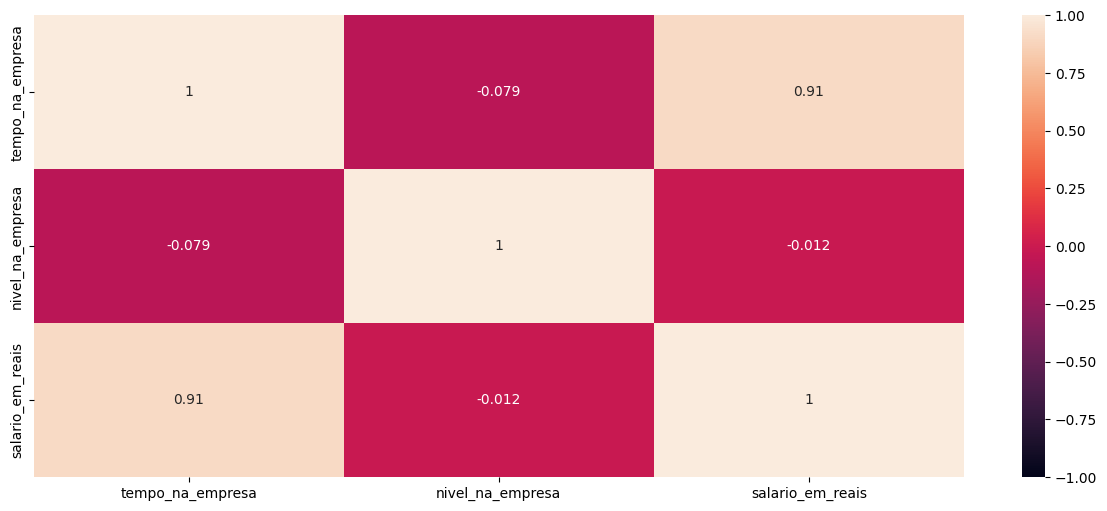

In [17]:
plt.figure(figsize=(15,6))
sns.heatmap(df_salario_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

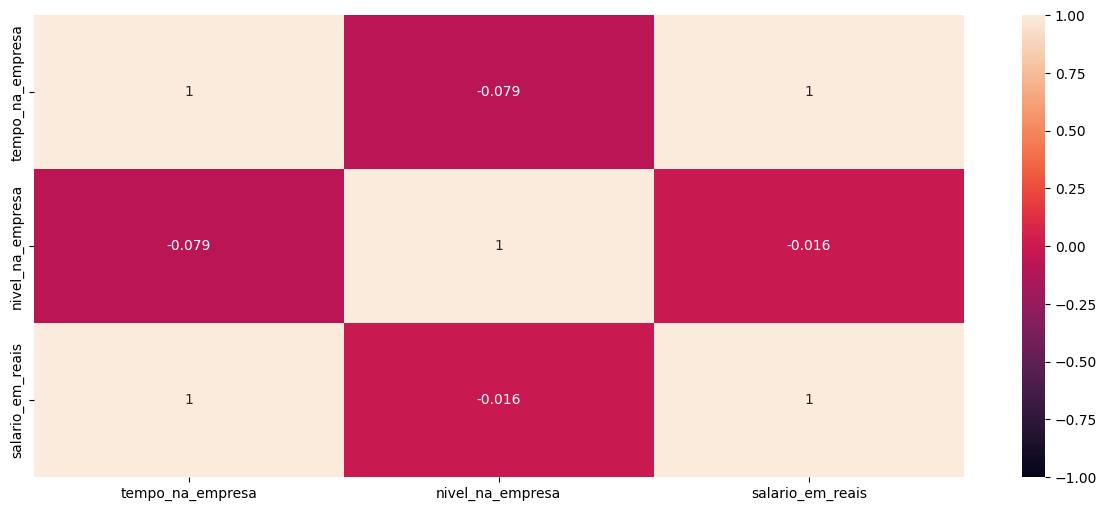

In [18]:
plt.figure(figsize=(15,6))
sns.heatmap(df_salario_eda.corr('spearman'), vmin=-1, vmax=1, annot=True)

<Axes: >

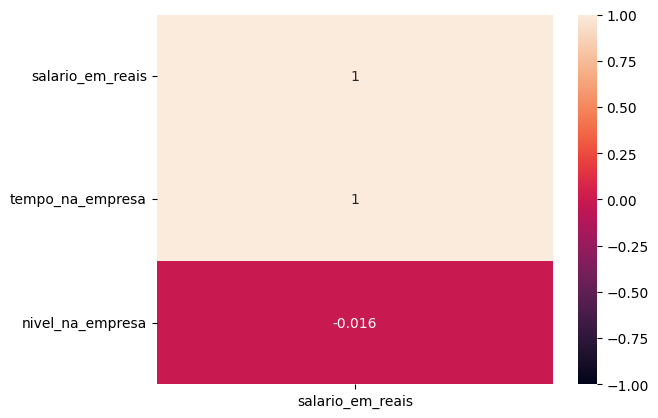

In [22]:
# Formato de rankink
sns.heatmap(data=df_salario_eda.corr('spearman')[['salario_em_reais']].sort_values(by='salario_em_reais', ascending=False), vmin=-1, vmax=1, annot=True)

In [23]:
# Bucketing Tempo de Casa
bins_tempo_de_casa = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]
labels_tempo_de_casa = ['0-9', '10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100-109','110-119','120-129']
df_salario_bucketing['escala_tempo'] =pd.cut(x=df_salario_bucketing['tempo_na_empresa'], bins=bins_tempo_de_casa, labels=labels_tempo_de_casa, include_lowest=True)

In [24]:
df_salario_bucketing.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69
5,105,10,12102.18,100-109
6,80,3,5723.35,70-79
7,85,2,6424.92,80-89
8,66,5,3916.18,60-69
9,73,5,4751.79,70-79


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

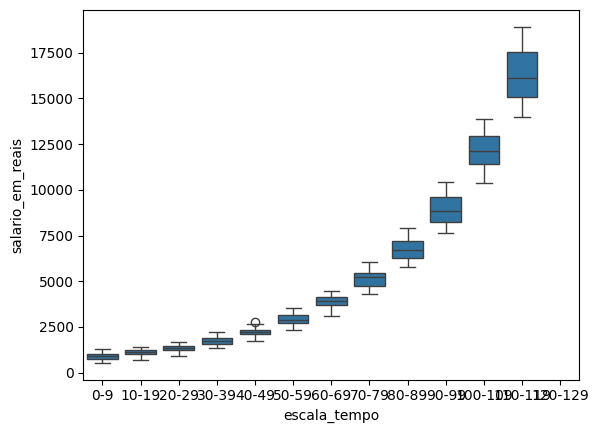

In [25]:
plt.Figure(figsize=(14,8))
sns.boxplot(data=df_salario_bucketing, x='escala_tempo', y='salario_em_reais')

## Treinar Modelo Linear 

In [34]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

In [27]:
# Criar dataset de treino e teste
x= df_salario.drop(columns=['salario_em_reais'], axis=1)
y=df_salario.salario_em_reais

In [ ]:
# Split dos dados usando Kfold com 5 pastas/splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [29]:
kf

KFold(n_splits=5, random_state=51, shuffle=True)

In [41]:
# Bloco para treinamento do modelo

# Pipeline
# Padronizar variaveis numericas - tempo_na_empresa, nivel_na_empresa

# Nome colunas
colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

# Transformer para colunas numericas
transformer_numerico = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Criar um ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', transformer_numerico, colunas_numericas)
])

# Pipeline principal
model_regr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Armazenar RMSE Treino e teste
rmse_scores_fold_train = []
rmse_scores_fold_test = []

# Armazenar R2 score test
r2score_fold_test = []

# Amazenar Residuos
residuos = []

# Amazenar Predicoes
y_pred_total = []

for train_index, test_index in kf.split(x): 
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Treinar modelo
    model_regr.fit(x_train, y_train)
    
    # Faça predicoes nos conjuntos de treinamento de de teste
    y_train_pred = model_regr.predict(x_train)
    y_test_pred = model_regr.predict(x_test)
    
    # Calcule o Rmse, r2score e residuos
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2score_test = r2_score(y_test, y_test_pred)
    residuos_test = np.array(y_test - y_test_pred)
    
    rmse_scores_fold_test.append(rmse_test)
    rmse_scores_fold_train.append(rmse_train)
    r2score_fold_test.append(r2score_test)
    residuos.append(residuos_test)
    y_pred_total.append(y_test_pred)
    
rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
r2score_test_final = np.mean(r2score_fold_test)
percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final)*100
residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)

### Analise metricas - Modelo Linear

In [43]:
# METRICAS 
print(f'RMSE treino: {rmse_train_final}')
print(f'RMSE teste: {rmse_test_final}')
print(f'% Dif. RMSE Treino e Teste: {percentual_rmse_final}')
print(f'R2score Test: {r2score_test_final}')


RMSE treino: 1882.8318426651392
RMSE teste: 1886.4504221336076
% Dif. RMSE Treino e Teste: 0.19218813844503052
R2score Test: 0.8261178870584761


### Analise de residuos - Modelo Linear

In [44]:
# Transformar residuos na escala padrão

from scipy.stats import zscore
residuos_std = zscore(residuos)

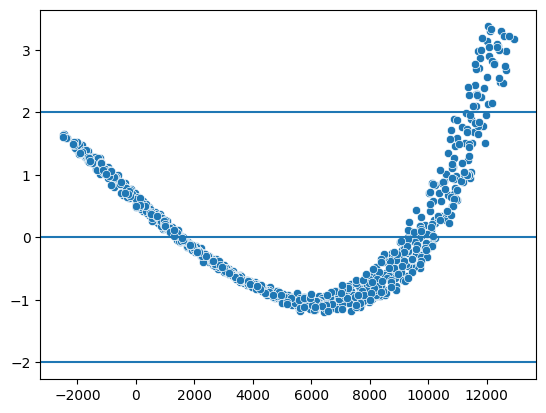

In [46]:
# Verifica linearidade dos residuos - Valores entre -2 e 2

# Verificar graficamente a homocedasticidade - entorno da reta sem padrao

sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

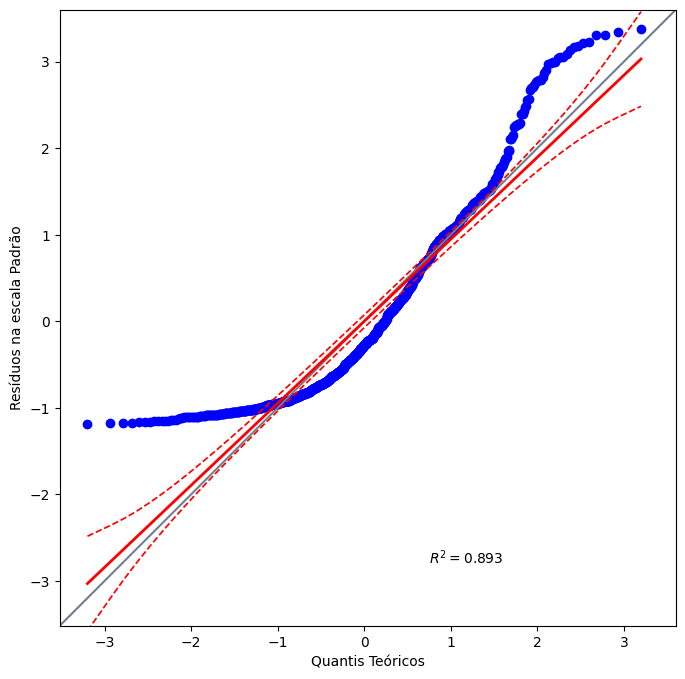

In [47]:
# Checar se residuos seguem a distribuicao normal
# QQ plot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala Padrão')
plt.show()

In [48]:
# Teste de normalidade
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
shat_shapiro, pvalue_shapiro = shapiro(residuos)
print(f"Est. Shapiro: {shat_shapiro}, P-value: {pvalue_shapiro}")

Est. Shapiro: 0.891969217965228, P-value: 7.013497918013492e-26


In [50]:
shat_ks, pvalue_ks = kstest(residuos, 'norm')
print(f"Est. KS: {shat_ks}, P-value: {pvalue_ks}")

Est. KS: 0.5939999999999955, P-value: 0.0


In [52]:
shat_ll, pvalue_ll = lilliefors(residuos,dist= 'norm', pvalmethod='table')
print(f"Est. LL: {shat_ll}, P-value: {pvalue_ll}")

Est. LL: 0.11825983774680088, P-value: 0.0009999999999998899


## Treinar Modelo Polinomial

In [ ]:
# Exemplo de criacao de features polinomiais
feat_poly = PolynomialFeatures(degree=3, include_bias=False)
# degree -> grau do polinomio
# include_bias -> feature com valor fixo (1)
x_poly = feat_poly.fit_transform(x)
feat_poly.feature_names_in_

array(['tempo_na_empresa', 'nivel_na_empresa'], dtype=object)

In [54]:
feat_poly.get_feature_names_out(feat_poly.feature_names_in_)

array(['tempo_na_empresa', 'nivel_na_empresa', 'tempo_na_empresa^2',
       'tempo_na_empresa nivel_na_empresa', 'nivel_na_empresa^2',
       'tempo_na_empresa^3', 'tempo_na_empresa^2 nivel_na_empresa',
       'tempo_na_empresa nivel_na_empresa^2', 'nivel_na_empresa^3'],
      dtype=object)

In [57]:
# Bloco para treinamento do modelo

graus_polynomial = [1,2,3,4,5,6,7,8,9,10]

rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

kf = KFold(n_splits=5, shuffle=True, random_state=51)

for grau in graus_polynomial:
    # Pipeline
    # Padronizar variaveis numericas - tempo_na_empresa, nivel_na_empresa

    # Nome colunas
    colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

    # Transformer para colunas numericas
    transformer_numerico = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Criar um ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
        ('num', transformer_numerico, colunas_numericas)
    ])
    
    # Criar features polinomias
    poly_feat = PolynomialFeatures(degree=grau, include_bias=False)

    # Pipeline principal
    model_poly = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly_features', poly_feat),
        ('regressor', LinearRegression())
    ])

    # Armazenar RMSE Treino e teste
    rmse_scores_fold_train = []
    rmse_scores_fold_test = []

    # Armazenar R2 score test
    r2score_fold_test = []

    # Amazenar Residuos
    residuos = []

    # Amazenar Predicoes
    y_pred_total = []

    for train_index, test_index in kf.split(x): 
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Treinar modelo
        model_poly.fit(x_train, y_train)
        
        # Faça predicoes nos conjuntos de treinamento de de teste
        y_train_pred = model_poly.predict(x_train)
        y_test_pred = model_poly.predict(x_test)
        
        # Calcule o Rmse, r2score e residuos
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        r2score_test = r2_score(y_test, y_test_pred)
        residuos_test = np.array(y_test - y_test_pred)
        
        rmse_scores_fold_test.append(rmse_test)
        rmse_scores_fold_train.append(rmse_train)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)
        
    rmse_train_final = np.mean(rmse_scores_fold_train)
    rmse_test_final = np.mean(rmse_scores_fold_test)
    r2score_test_final = np.mean(r2score_fold_test)
    percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final)*100
    residuos = np.array(residuos).reshape(-1)
    y_pred_total = np.array(y_pred_total).reshape(-1)
    
    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)


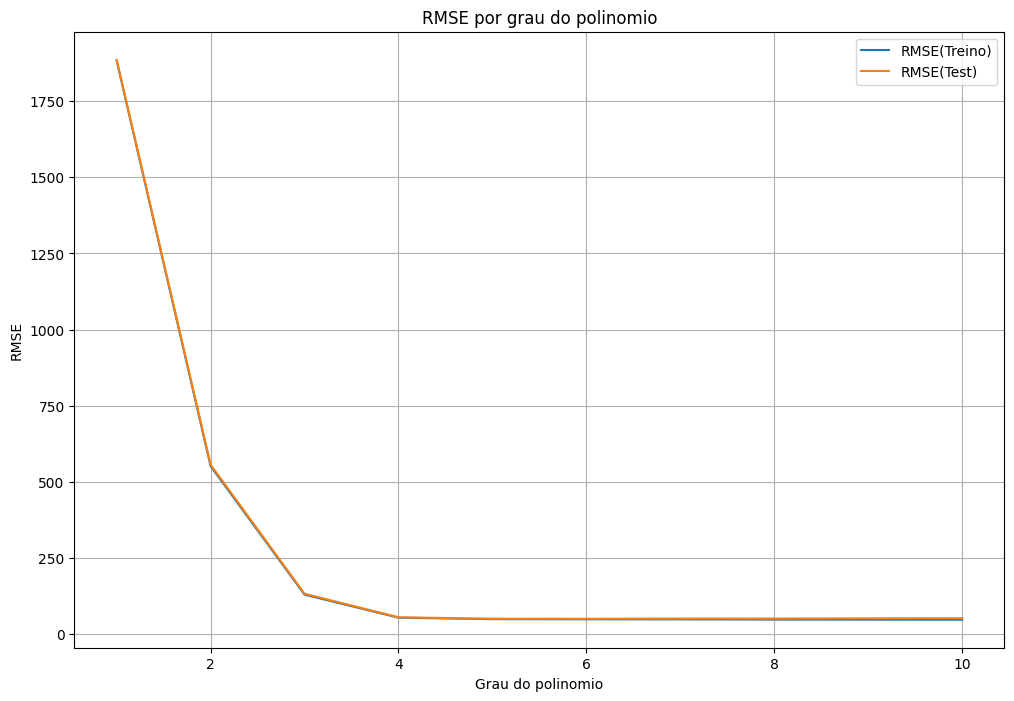

In [60]:
# Plotar grafico para comparar rmse por grau de polinomio
plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, rmse_train_values, label='RMSE(Treino)')
plt.plot(graus_polynomial, rmse_test_values, label='RMSE(Test)')
plt.xlabel('Grau do polinomio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinomio')
plt.legend()
plt.grid(True)
plt.show()

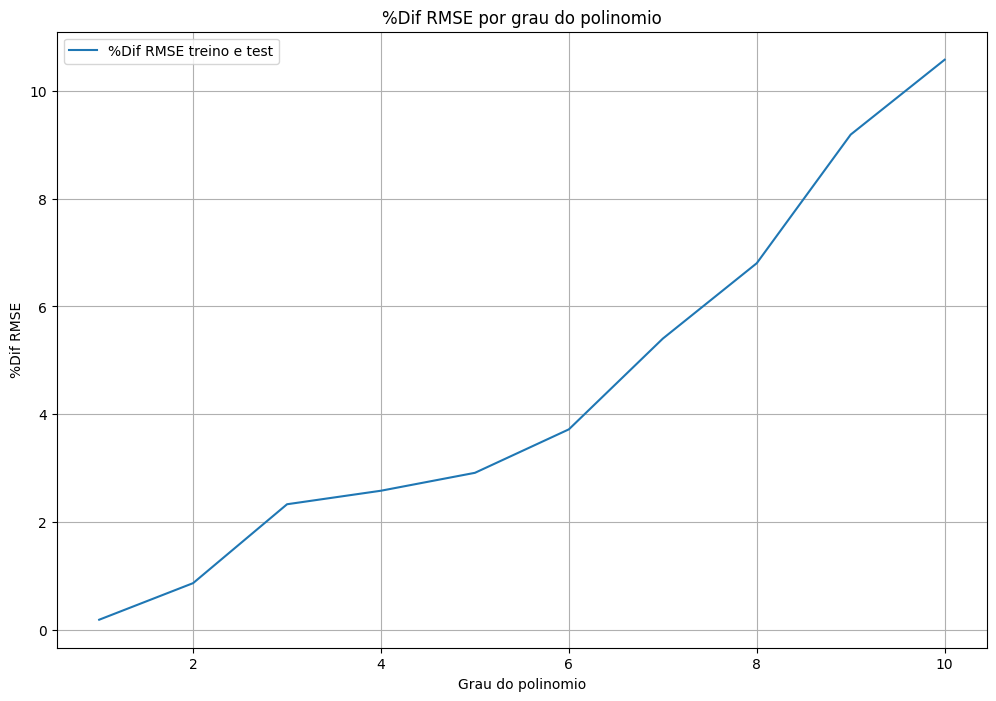

In [61]:
# Plotar grafico para comparar percentual de diferenca de treino e teste rmse
plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, percentual_rmse_values, label='%Dif RMSE treino e test')
plt.xlabel('Grau do polinomio')
plt.ylabel('%Dif RMSE')
plt.title('%Dif RMSE por grau do polinomio')
plt.legend()
plt.grid(True)
plt.show()

A partir da analise do grafico vericamos que o polinomio de grau 4 é o ideal para o modelo

In [62]:
# Bloco para treinamento do modelo

# graus_polynomial = [1,2,3,4,5,6,7,8,9,10]
graus_polynomial = [4]

rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

kf = KFold(n_splits=5, shuffle=True, random_state=51)

for grau in graus_polynomial:
    # Pipeline
    # Padronizar variaveis numericas - tempo_na_empresa, nivel_na_empresa

    # Nome colunas
    colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

    # Transformer para colunas numericas
    transformer_numerico = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Criar um ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
        ('num', transformer_numerico, colunas_numericas)
    ])
    
    # Criar features polinomias
    poly_feat = PolynomialFeatures(degree=grau, include_bias=False)

    # Pipeline principal
    model_poly = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly_features', poly_feat),
        ('regressor', LinearRegression())
    ])

    # Armazenar RMSE Treino e teste
    rmse_scores_fold_train = []
    rmse_scores_fold_test = []

    # Armazenar R2 score test
    r2score_fold_test = []

    # Amazenar Residuos
    residuos = []

    # Amazenar Predicoes
    y_pred_total = []

    for train_index, test_index in kf.split(x): 
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Treinar modelo
        model_poly.fit(x_train, y_train)
        
        # Faça predicoes nos conjuntos de treinamento de de teste
        y_train_pred = model_poly.predict(x_train)
        y_test_pred = model_poly.predict(x_test)
        
        # Calcule o Rmse, r2score e residuos
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        r2score_test = r2_score(y_test, y_test_pred)
        residuos_test = np.array(y_test - y_test_pred)
        
        rmse_scores_fold_test.append(rmse_test)
        rmse_scores_fold_train.append(rmse_train)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)
        
    rmse_train_final = np.mean(rmse_scores_fold_train)
    rmse_test_final = np.mean(rmse_scores_fold_test)
    r2score_test_final = np.mean(r2score_fold_test)
    percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final)*100
    residuos = np.array(residuos).reshape(-1)
    y_pred_total = np.array(y_pred_total).reshape(-1)
    
    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)


### Analise metricas - Modelo Polinomial

In [63]:
# METRICAS 
print(f'RMSE treino: {rmse_train_final}')
print(f'RMSE teste: {rmse_test_final}')
print(f'% Dif. RMSE Treino e Teste: {percentual_rmse_final}')
print(f'R2score Test: {r2score_test_final}')


RMSE treino: 53.32698559565161
RMSE teste: 54.70504352796304
% Dif. RMSE Treino e Teste: 2.5841661907546576
R2score Test: 0.9998524123039415


### Analise de residuos - Modelo Polinomial

In [64]:
# Transformar residuos na escala padrão

from scipy.stats import zscore
residuos_std = zscore(residuos)

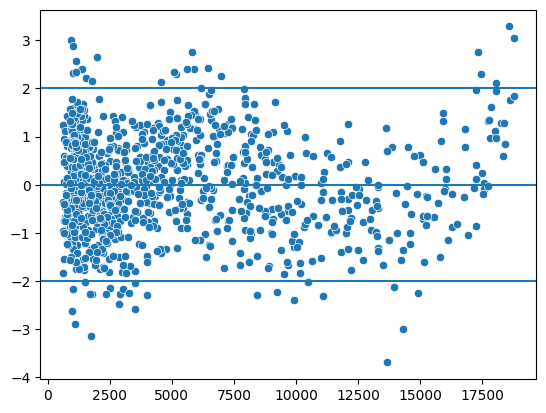

In [65]:
# Verifica linearidade dos residuos - Valores entre -2 e 2

# Verificar graficamente a homocedasticidade - entorno da reta sem padrao

sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

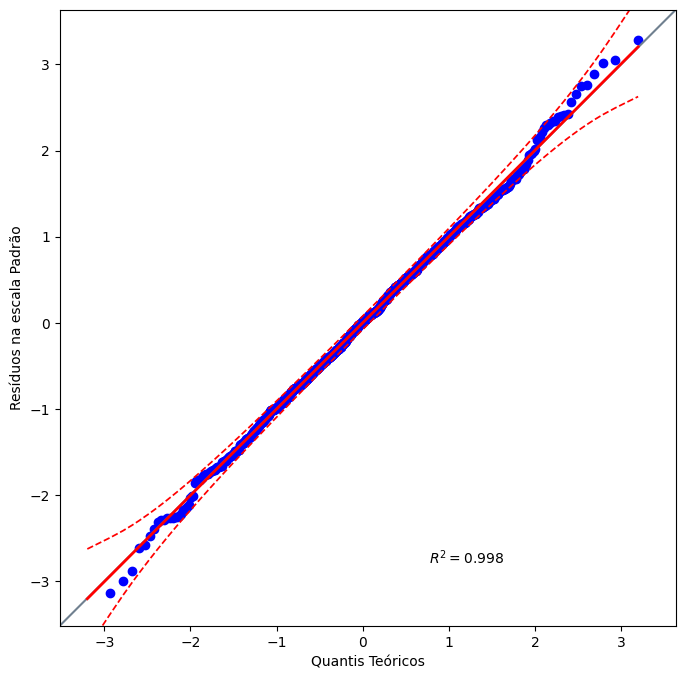

In [66]:
# Checar se residuos seguem a distribuicao normal
# QQ plot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala Padrão')
plt.show()

In [67]:
# Teste de normalidade
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
shat_shapiro, pvalue_shapiro = shapiro(residuos)
print(f"Est. Shapiro: {shat_shapiro}, P-value: {pvalue_shapiro}")

Est. Shapiro: 0.9986951372205322, P-value: 0.6852797159659514


In [68]:
shat_ks, pvalue_ks = kstest(residuos, 'norm')
print(f"Est. KS: {shat_ks}, P-value: {pvalue_ks}")

Est. KS: 0.48237446499530856, P-value: 1.2202460106524514e-214


In [70]:
shat_ll, pvalue_ll = lilliefors(residuos,dist= 'norm', pvalmethod='table')
print(f"Est. LL: {shat_ll}, P-value: {pvalue_ll}")

Est. LL: 0.013637346894986191, P-value: 0.9566270022044506


### Realizar Predições Individuais

In [77]:
input_features ={
    'tempo_na_empresa': 80,
    'nivel_na_empresa': 10
}

pred_df = pd.DataFrame(input_features, index=[1])

In [76]:
# Predicao
model_poly.predict(pred_df)

array([5747.79896506])

In [79]:
import joblib

In [ ]:
# Salvar modelo
joblib.dump(model_poly, 'modelo_salario.pkl')

['modelo_salario.pkl']